# Artificial Neural Networks

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a>&nbsp;| [Dennis G. Wilson](http://d9w.github.io/) | <a href="https://d9w.github.io/deep-learning-intro/">https://d9w.github.io/deep-learning-intro/</a><br>Based on the Supaero Data Science Deep Learning class: https://supaerodatascience.github.io/deep-learning/

# Biological neural networks

Biological neurons are the base component of the nervous system and brain. Neurons are composed of a soma, the main cell body, which transmits signals through electrical impulses which travel down the axon into the dendrites of other neurons. Electrical signals from other neurons, received on the dendrites, build up a charge on the neural membrane and once this charge passes a certain limit, the neuron fires or spikes, sending a signal through its axon. While there are other forms of intracellular communication in the nervous system such as chemical neurotransmitters, electrical impulses or "spiking" are the main form of communication for most neurons.

<img src="img/neuron_bio.png" width="600px"></img>
A model of a typical neuron.

<img src="img/pyramidal_cells.png" width="600px"></img>
Pyramidal neurons in the cerebral cortex. This type of neuron is the main inspiration for cognitive models and artificial neural networks. Image source: Elston, Guy N. "Cortex, cognition and the cell: new insights into the pyramidal neuron and prefrontal function." Cerebral cortex 13.11 (2003): 1124-1138.

# Artificial Neurons

The human brain processes information efficiently, can we design an artificial computing method that mimics it?

Let's take inspiration from the biological neuron for that and make a simplified model of a neuron. Suppose an input signal in the form of a binary vector $x$. The elements of $x$ can indicate binary statements which are true or false, such as "it's raining" or "I have an umbrella". We will model the *activation* of a neuron as:
$$f(x)=\left\{\begin{array}{ll} 0 & \textrm{if }w^T x+b\leq 0 \\ 1 & \textrm{otherwise}\end{array}\right.=step\left(w^Tx + b\right),$$
where $step$ is Heaviside's step function. This simulates the firing of a neuron; 1 if it fires, 0 otherwise.

This model is known as the Perceptron and was introduced in the 1950s:

Rosenblatt, Frank. "The perceptron: a probabilistic model for information storage and organization in the brain." Psychological review 65.6 (1958): 386. [pdf](http://www.cs.cmu.edu/~epxing/Class/10715-14f/reading/Rosenblatt.perceptron.pdf)

<img src="img/perceptron.png" width="60%" height="auto">

Using this model and specific parameters ($w$ and $b$), we can make logic gates allowing for the construction of a circuit. We'll use 2 binary inputs and check all combinations.

In [3]:
import itertools
import numpy as np

lst = list(itertools.product([0., 1.], repeat=2))
x = np.array(lst)
x

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [4]:
def perceptron(w, b, x):
    return np.heaviside(np.dot(x, w) + b, 0)

<div class="alert alert-warning">
    
**Exercice: Back to the future, logical gates.** <br>
Take Rosenblatt's perceptron and find the parameters (weights and bias) that correspond to AND, OR and NAND gates for two binary inputs.</div>

<div class="alert alert-info">
Rosenblatt's perceptron is the function $step(w_1 x_1 + w_2 x_2 +b)$. 

With $(w_1, w_2, b) = (2, 2, -1)$ we get an OR gate. 

With $(w_1, w_2, b) = (1, 1, -1)$ we get an AND gate. 

With $(w_1, w_2, b) = (-1, -1, 2)$ we get a NAND gate.
</div>

In [299]:
w = [-1., -1.]
b = 2.
print("inputs: ", x)
perceptron(w, b, x)

inputs:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


array([1., 1., 1., 0.])

<div class="alert alert-warning">
    
**Exercice: Back to the future, the XOR affair.** <br> 
Does it seem possible to describe a XOR gate with a perceptron? Building a XOR function can be seen as a classification problem; what is the family of classification problems that can be tackled by perpectrons (hint: recall the beginning of the SVM class)?</div>

<div class="alert alert-info">
No, it is actually not possible to model a XOR gate with a perceptron. Since perceptrons implement a threshold on a linear combination of the inputs, they can only separate (shatter, in VC theory) classes that are... linearly separable. XOR is a typical example of non-linearly separable data.
</div>

# Artificial Neural Networks

It is possible to connect perceptrons together to get a XOR function (for example by remarking that $x_1$ XOR $x_2$ = $(x_1$ OR $x_2)$ AND $(x_1$ NAND $x_2)$). It is actually possible to do so for any logical function. Such connected architectures are called Multi-Layer Perceptrons (MLP). This term was later used for multi-layered networks of artifical neurons, regardless of their activation functions. The modern term for multiple networks connected in a graph is an Artificial Neural Network.

<img src="./img/xor.png" width="600px"></img>

In [190]:
def XOR(x):
    y1 = perceptron([2., 2.], -1, x) # OR
    y2 = perceptron([-2, -2], 3, x) # NAND
    y = np.array([y1,y2]).T
    z = perceptron([2., 2.], -3, y) # AND
    return z
print("input values:\n", x)
print("testing XOR gate:", XOR(x))
print("XOR:", np.logical_xor(x[:,0], x[:,1]))

input values:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
testing XOR gate: [0. 1. 1. 0.]
XOR: [False  True  True False]


As a consequence, any logical circuit can be represented as an MLP. **This seems a great ground for computer-based intelligence!**

Now the question is "how does one find (learn) the structure and weights of a neural network that seems intelligent?". That's what we'll see in the [next notebook](https://github.com/d9w/deep-learning-intro/blob/main/2.%20Training%20ANNs.ipynb), but let's explore artificial neural networks a bit more first.

# Universal Approximation with ANNs

So far, we have considered a drastic "0 or 1" activation for a certain neuron. Suppose now that the input $x$ is not binary anymore: it is made of continuous variables, like a temperature, or a user preference. Then, when processing an input $x$, either the neuron's stimulation $w^Tx$ is above $-b$ or it is below. This makes the output of a neuron very sensitive to noise in the input, or to errors in setting the weights. Conversely, we could wish for a function that is *S-shaped* and that transitions smoothly from 0 to 1.

An example of such a function is the sigmoid function:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

In [195]:
def sigmoid(x):
    return 1./(1. + np.exp(-x))

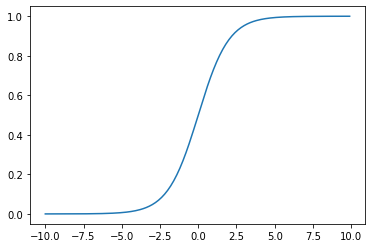

In [196]:
import matplotlib.pyplot as plt
XX = np.arange(-10.,10.,0.1)
plt.plot(XX,sigmoid(XX));

The sigmoid activation is far from the only activation function used in modern ANNs. Here are a few others:

- step
$$\sigma(x) = 0 \textrm{ if }x\leq0\textrm{, }1\textrm{ otherwise}$$
- linear
$$\sigma(x) = x$$
- Rectified linear (ReLU)
$$\sigma(x) = \max(0, x)$$
- hyperbolic tangent
$$\sigma(x) = \frac{e^{x} + e^{-x}}{e^{x} - e^{-x}}$$
- radial basis function
$$\sigma(x) = e^{-x^2}$$

We'll use the sigmoid activation to illustrative an important property of artificial neural networks: the universal approximation property. In general terms, the universal approximation theorem demonstrates that a neural network can approximate any function. While there are many proofs concerning neural networks and universality, we'll focus on an illustrative example.

Consider a neural network with two neurons:

<img src="img/simplenet.png" width="20%">

We will consider that the neurons use a sigmoid activation function.

In [226]:
def ANN(x, w, b):
    y = sigmoid(np.dot(x, w[0].T) + b[0])
    return np.dot(y, w[1].T) + b[1], y

Using this network, we can combine multiple sigmoid functions which have different weights. For example, we can create an output which is a single bump by combining two opposing sigmoid functions.

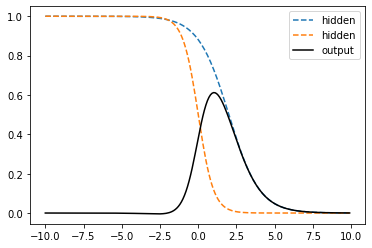

In [247]:
weights = [np.array([[-1], [-2]]), np.array([[1, -1]])]
biases = [np.array([2, 0]), np.array([0])]
plt.plot(XX,[ANN(np.array([[i]]), weights, biases)[1][0] for i in XX], '--', label='hidden');
plt.plot(XX,[ANN(np.array([[i]]), weights, biases)[0][0] for i in XX], c='k', label='output');
plt.legend();

By adding more neurons in the hidden layer, we can add a second bump. Again, the weights and biases of these additional neurons will determine the bump shape and placement.

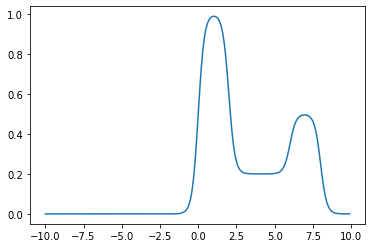

In [254]:
weights = [np.array([[-5], [-5], [-5], [-5]]), np.array([[0.8, -1., 0.5, -0.3]])]
biases = [np.array([10, 0, 40, 30]), np.array([0])]
plt.plot(XX,[ANN(np.array([[i]]), weights, biases)[0][0] for i in XX]);

By adding more neurons, we can approximate functions like `sin`.

Mean Squared Error:  0.03595156085382894


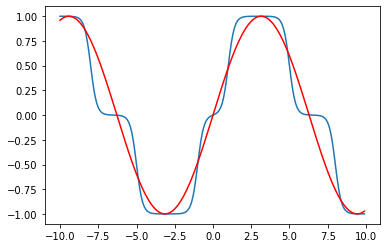

In [255]:
weights = [-5.*np.ones((8, 1)), np.array([[-1, 1, 1, -1, 1, -1, -1, 1]])]
biases = [np.array([-60., -40., -25., -5., 25., 5., 60., 40.]), np.array([0])]
outputs = np.array([ANN(np.array([[i]]), weights, biases)[0][0] for i in XX])
plt.plot(XX,outputs);
plt.plot(XX,np.sin(0.5*XX), 'r');
print("Mean Squared Error: ", np.mean((outputs.flatten() - np.sin(0.5*XX))**2))

The more neurons added, the better our approximation can become. As we'll see later, adding more and more neurons to a single layer isn't how deep learning ANNs are structured, but it is important to understand that a single layer of neurons can, given enough neurons, approximate any continuous function.

# Propagating values through a network

Let's define a neural network that has the following structure:
- 2 input neurons
- first hidden layer with 4 sigmoid neurons
- second hidden layer with 3 sigmoid neurons
- one output layer with an identity neuron

<img src="img/nn2.png" width="600px"></img>

In [269]:
sizes = [2,4,3,1]
num_layers = len(sizes)

We will use random weights for the network, specificially we will choose weights and biases following a $\mathcal{N}(0,1)$ distribution.

In [295]:
biases = [np.random.randn(1,y) for y in sizes[1:]]
weights = [np.random.randn(out,inp) for inp,out in zip(sizes[:-1],sizes[1:])]
weights, biases

([array([[-1.209977  ,  0.11836933],
         [-0.44962416,  1.3951661 ],
         [ 0.45916296, -0.93768859],
         [ 0.42315196,  0.82668442]]),
  array([[ 0.13572595, -0.32215722, -2.44051641, -0.01217065],
         [-1.30984466, -1.36506322,  1.77214407, -0.04627609],
         [-0.07566084, -2.29835341,  1.30415112,  1.26038033]]),
  array([[ 0.14290152,  0.72050686, -0.02444211]])],
 [array([[-0.81851719,  0.95278023, -0.05300707,  0.83873211]]),
  array([[0.32500246, 0.19380375, 0.84279826]]),
  array([[0.15133057]])])

<div class="alert alert-warning">
    
**Exercice:**<br>
Write a function that computes the forward propagation of the input $x=[0,1]$ through the network and returns the outputs and all intermediate activations.
</div>

In [280]:
def forward_pass(x, weights, biases, verbose=False):
    y = [np.zeros((x.shape[0], sz)) for sz in sizes]
    y[0] = x.copy()
    for i in range(1,len(sizes)):
        if verbose:
            print("# Forward propagation to layer", i)
        inputs = np.dot(y[i-1],weights[i-1].T) + biases[i-1]
        if verbose:
            print("Neuron inputs:", inputs)
        if i == len(sizes)-1:
            y[i] = inputs # final identity neuron
        else:
            y[i] = sigmoid(inputs)
        if verbose:
            print("Layer outputs:", y[i])
    return y

In [296]:
y = forward_pass(np.array([[0,1]]), weights, biases, verbose=True)

# Forward propagation to layer 1
Neuron inputs: [[-0.70014786  2.34794633 -0.99069566  1.66541653]]
Layer outputs: [[0.33177945 0.91277085 0.27077469 0.84096377]]
# Forward propagation to layer 2
Neuron inputs: [[-0.59508734 -1.04583045  0.13289087]]
Layer outputs: [[0.35546844 0.26002657 0.53317391]]
# Forward propagation to layer 3
Neuron inputs: [[0.37644659]]
Layer outputs: [[0.37644659]]


By re-initializing the weights and biases, we can see how the output of the neural network depends on these parameters. In the next notebook, we'll learn how to train these parameters to match a target distribution.